# Coding part

Juan Vila

## Q2.1

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt


x=np.array([[25,0,1],[20,1,2],[40,1,6]])
y=np.array([[110],[110],[210]])

In [4]:
def solver2(y,x_s):
    solution = np.dot(np.linalg.inv(x_s),y)
    return solution
w = solver2(y,x)
print(w)

[[ 4.25]
 [17.5 ]
 [ 3.75]]


**Comment**: w=[4.25,17.5,3.74]

## Q4

In [7]:
#import data
q4_data = sio.loadmat('face_emotion_data.mat')
q4_x=q4_data['X']
q4_y=q4_data['y']
#Functions
def beta_est(Y,x,cons=True):
    if cons:
        X = np.column_stack((x,np.ones([len(x),1])))
    else:
        X=x.copy()
    return np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),\
                  np.dot(np.transpose(X),Y))

def polynomial(x,d):
    rv = x.copy()
    if d>1:
        for i in range(2,d+1):
           rv =  np.column_stack((rv,x ** i))
    else:
        return x
    
    return rv

def proyection(Y,x, cons=True):
    if cons:
        X = np.column_stack((x,np.ones([len(x),1])))
    else:
        X=x.copy()
    y_hat = np.dot(X,beta_est(Y,x,cons))
    return y_hat

def cross_val(y,X,n):
    data = np.column_stack((y,X))
    np.random.shuffle(data)
    data_cv = np.split(data,n)
    rv =[]
    for i in range(n):
        temp=data_cv.copy()
        test_set = temp.pop(i)
        y_test, x_test =  test_set[:,[0]], test_set[:,1:]
        train_set = np.concatenate(temp,axis=0)
        y_train, x_train = train_set[:,[0]], train_set[:,1:]
        w = beta_est(y_train, x_train)
        x_test = np.column_stack((x_test,np.ones([len(x_test),1])))
        y_hat = np.dot(x_test,w)
        count = 0
        y_label_assig = np.where(y_hat>0,1,-1)
        for i,j in enumerate(y_test):
            if y_label_assig[i]==1 and y_test[i]==-1 or\
            y_label_assig[i]==-1 and y_test[i]==+1:
                count+=1
        rv.append(count/16)
    rv=np.array(rv)
    
    return rv.mean()

### Part A

In [12]:
wq4a = beta_est(q4_y, q4_x)
print(wq4a)

[[ 0.94366942]
 [ 0.21373778]
 [ 0.26641775]
 [-0.39221373]
 [-0.00538552]
 [-0.01764687]
 [-0.16632809]
 [-0.0822838 ]
 [-0.16644364]
 [ 0.078125  ]]


### Part B

I would predict using the Y variable using this wheigths and then i would input the labels with the following 
rule: If Y_hat>0 y_labels_p=1 , 0 otherwise. The code is implemented in the command cross val as the following:
y_label_assig = np.where(y_hat>0,1,-1)

### Part C

**Comment**: I will select the three biggest absolute value weights, this are x1, x3 and x4. The estimator value are .94,.26 and -.39 respectively.

### Part D

In [13]:
q4_x_d = q4_x[:,[0]]
q4_x_d = np.column_stack((q4_x_d,q4_x[:,[2]]))
q4_x_d = np.column_stack((q4_x_d,q4_x[:,[3]]))
beta_est(q4_y, q4_x_d)

array([[ 0.70546316],
       [ 0.8737872 ],
       [-0.78805643],
       [ 0.078125  ]])

**Comment**: If we run the regression with this only three estimates we found that the new estimates are  .70,.87 and -.78, which made sence because we dropped the other variables.

### Part E

In [20]:
np.random.seed(1234)
cross_val(q4_y,q4_x,8)

0.0390625

**Comment**: The mean error is 3.9%

### Part F

In [21]:
cross_val(q4_y,q4_x_d,8)  

0.0625

**Comment**: The mean error is 6.25% which made sence because LS as you use more features will improve the prediction. That dosent mean that we have to put infinite features because we can have other problems as bias.

## Q5.c

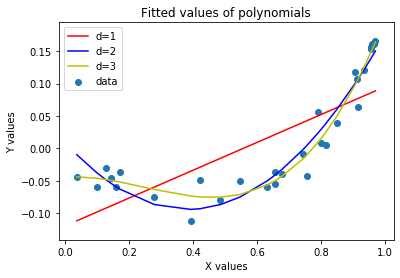

In [22]:
pol=[1,2,3]
d = sio.loadmat('polydata.mat')
x_5 = d['x']
y_5 = d['y']
y_comp = x_5.copy()
y_comp = np.column_stack((y_comp,y_5))
for i in pol:
    x_pol = polynomial(x_5,i)
    y_hat_temp = proyection(y_5,x_pol)
    y_comp =  np.column_stack((y_comp,y_hat_temp))
g1 = y_comp[:,0:2]
g2 = y_comp[:,[0]]
g2 =  np.column_stack((g2,y_comp[:,[2]]))
g2 = g2[g2[:, 0].argsort()]
g4 = y_comp[:,[0]]
g4 =  np.column_stack((g4,y_comp[:,[4]]))
g4 = g4[g4[:, 0].argsort()]
g3 = y_comp[:,[0]]
g3 =  np.column_stack((g3,y_comp[:,[3]]))
g3 = g3[g3[:, 0].argsort()]
   
plt.scatter(g1[:,[0]],g1[:,[1]],label = 'data')
plt.plot(g2[:,[0]],g2[:,[1]],color='r', label='d=1')
plt.plot(g3[:,[0]], g3[:,[1]],color='b',label='d=2')
plt.plot(g4[:,[0]], g4[:,[1]],color='y',label='d=3')
plt.ylabel('Y values')
plt.xlabel('X values')
plt.title('Fitted values of polynomials')
plt.legend()
plt.show()
